<a href="https://colab.research.google.com/github/tjddyd2259/caba_nlp/blob/main/DL20_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# 매개변수 num_words=10000은 훈련 데이터에서 가장 자주 나ㅓ오는 단어 10000개만 사용한다는 의미

print(train_data.shape)
print(train_labels[0])

17465344/17464789 [==============================] - 0s 0us/step
(25000,)
1


In [ ]:
# 변수 train_data 와 test_data는 리뷰 목록이며 단어 인덱스의 리스트이다. 단어 시퀀스가 인코딩된 것이다.
# test_labels는 부정(0), 긍정(1)을 나타내는 리스트이다.

In [2]:
max([max(sequence)for sequence in train_data])

9999

In [3]:
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

데이터 준비               
신경망에 숫자 리스트를 주입할 수 없다. 리스트를 텐서로 바꾸어 주어야 한다.
- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 전환한 다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫번째 층으로 사용 
- 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환한다. 예를 들어 [3,5]를 3과 5 위치는 1이고 나머지는 0 인 10000차원의 벡터로 변환

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension =10000):
  results = np.zeros((len(sequences),dimension))
  for i ,sequence in enumerate(sequences):
    results[i,sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train.shape

(25000, 10000)

In [8]:
x_train[:5]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

신경망 모델 만들기


In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

컴파일
- 손실함수
- 옵티마이저
- 모니터링 방법

In [12]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
# 훈련 검증 : 10000개의 샘플용 검증용 세트로 분리
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [14]:
# 512개씩 미니 배치로 만들어 20번의 에포크 동안 훈련

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 36ms/step - loss: 0.6065 - accuracy: 0.7132 - val_loss: 0.4290 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3711 - accuracy: 0.8981 - val_loss: 0.3325 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2663 - accuracy: 0.9235 - val_loss: 0.3144 - val_accuracy: 0.8738
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2099 - accuracy: 0.9357 - val_loss: 0.3252 - val_accuracy: 0.8655
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1723 - accuracy: 0.9472 - val_loss: 0.2813 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1375 - accuracy: 0.9603 - val_loss: 0.2768 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1151 - accuracy: 0.9681 - val_loss: 0.2884 - val_accuracy: 0.8880
Epoch 8/20
30

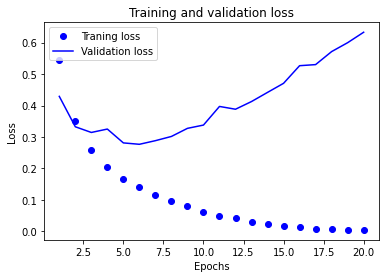

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label = 'Traning loss')
plt.plot(epochs,val_loss , 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

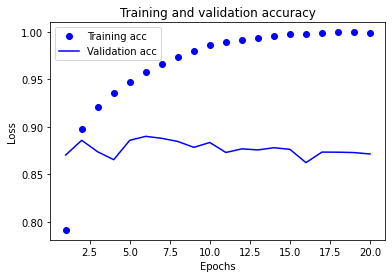

In [17]:
plt.clf()# 그래프 초기화
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5759 - accuracy: 0.7254
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2840 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2052 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2949 - accuracy: 0.8832


In [21]:
results

[0.29493170976638794, 0.8831599950790405]

In [22]:
model.predict(x_test)

array([[0.18164247],
       [0.9999386 ],
       [0.80306464],
       ...,
       [0.10681549],
       [0.07510103],
       [0.6247551 ]], dtype=float32)